## Exploration and first EDA

### Make necessary imports

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy.stats import stats 

%matplotlib inline
plt.style.use('ggplot')

#from ltests import model

### Import our combined csv into a DataFrame

In [23]:
raw = pd.read_csv('../../data/master.csv', low_memory=False, dtype={'id': object})

In [24]:
#how many entries are there?
raw.shape[0]

62039

### We would like to select only those entries that have a sale price greater than 0

In [25]:
raw = raw[raw.SalePrice > 0]
raw.shape[0]

42214

### Now we select the sales with the proper PropertyType codes
The following are of interest to us:
 - 11: Household, single family units

  
*These codes can be found in the Lookup.zip file located at*

https://info.kingcounty.gov/assessor/DataDownload/default.aspx 

In [26]:
proptypes = [11]

df = raw[raw.PropertyType.isin(proptypes)]
df.shape[0]


19264

In [27]:
# Check for duplicate entries
df.duplicated().sum()

0

In [28]:
# Check for na's
df.isnull().sum()

id                    0
ExciseTaxNbr          0
DocumentDate          0
SalePrice             0
RecordingNbr          0
                   ... 
Obsolescence        457
PcntNetCondition    457
Condition           457
AddnlCost           457
footprint           457
Length: 151, dtype: int64

In [29]:
#set the target to column index 0
cols = list(df.columns)
cols = [cols[3]] + cols[:3] + cols[4:]
df = df[cols]
df.head()

,SalePrice,id,ExciseTaxNbr,DocumentDate,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot,...,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost,footprint
2,485500,0001000042,3018323,10/29/2019,20191031001228,,,,,,...,0.0,0.0,2016.0,0.0,0.0,0.0,0.0,3.0,0.0,0.238254
8,358308,0001000067,2979287,03/18/2019,20190327000321,,,,,,...,0.0,1.0,1946.0,0.0,0.0,0.0,0.0,4.0,0.0,0.128736
11,850000,0001200008,2991776,05/17/2019,20190604001211,,,,,,...,0.0,1.0,1964.0,0.0,0.0,0.0,0.0,4.0,0.0,0.072488
22,465000,0002000015,3022128,11/19/2019,20191122001296,,,,,,...,0.0,1.0,1961.0,0.0,0.0,0.0,0.0,5.0,0.0,0.086336
36,350000,0003000086,2995868,06/18/2019,,,,,,,...,0.0,0.0,1948.0,0.0,0.0,0.0,0.0,4.0,0.0,0.081522


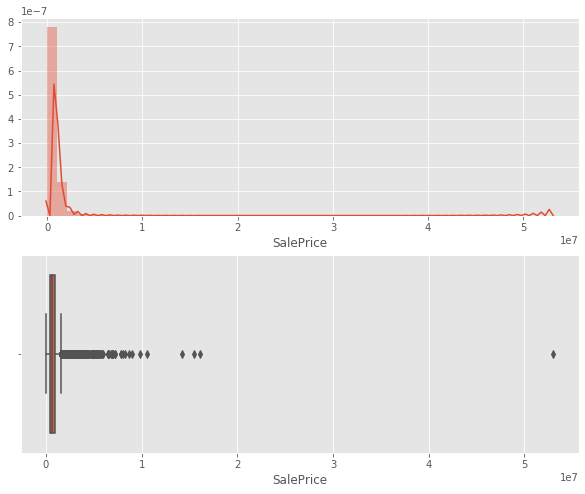

In [31]:
#Plot a histogram of its distribution as well as a boxplot

fig, ax = plt.subplots(2,1, figsize=(10,8))

sns.distplot(df.SalePrice, ax = ax[0])
sns.boxplot(df.SalePrice, ax = ax[1]);

### What does this tell us?

In [32]:
print(f'''Big right skew. Lots of outliers.
        Mean of {round(df.SalePrice.mean(), 2)}
        Median of {round(df.SalePrice.median(), 2)}
        ''')

Big right skew. Lots of outliers.
        Mean of 794492.51
        Median of 654475.0
        


In [39]:
df.corr()

,SalePrice,ExciseTaxNbr,PropertyType,PrincipalUse,SaleInstrument,SaleReason,PropertyClass,Range,Township,Section,...,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost,footprint
SalePrice,1.000000,0.007350,NaN,0.050584,-0.048389,-0.017877,-0.042863,0.001761,0.286491,0.001026,...,-0.056476,0.134100,0.088851,0.116709,0.045041,0.016736,-0.008064,-0.046432,0.106771,0.020072
ExciseTaxNbr,0.007350,1.000000,NaN,-0.011578,-0.028716,0.036349,-0.010677,0.010603,0.008788,0.000790,...,-0.004374,0.001348,-0.010074,-0.008317,0.039418,-0.001500,-0.003832,-0.013566,0.011229,-0.015283
PropertyType,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PrincipalUse,0.050584,-0.011578,NaN,1.000000,-0.007705,0.001019,0.561379,-0.033371,0.000710,-0.001966,...,-0.003297,-0.005554,-0.002213,-0.002889,0.084276,-0.000602,-0.000178,-0.002325,-0.003511,0.016187
SaleInstrument,-0.048389,-0.028716,NaN,-0.007705,1.000000,0.167075,-0.003049,-0.011626,-0.021033,-0.011194,...,0.014248,0.003258,-0.021098,0.004701,-0.004840,-0.003767,-0.000944,-0.010794,-0.005979,-0.029693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Obsolescence,0.016736,-0.001500,NaN,-0.000602,-0.003767,-0.000778,0.003502,-0.003856,0.005103,-0.010408,...,0.012201,0.007923,-0.041463,0.044109,-0.002896,1.000000,-0.000672,-0.022586,-0.010971,-0.017797
PcntNetCondition,-0.008064,-0.003832,NaN,-0.000178,-0.000944,-0.000230,-0.015902,-0.000591,-0.005023,0.009140,...,-0.003675,-0.005841,-0.009150,-0.003220,-0.000855,-0.000672,1.000000,-0.003328,-0.003913,-0.013134
Condition,-0.046432,-0.013566,NaN,-0.002325,-0.010794,-0.010833,0.041997,-0.032877,-0.064316,-0.019801,...,0.084576,0.128939,-0.336301,-0.087324,-0.038073,-0.022586,-0.003328,1.000000,-0.084083,-0.167787
AddnlCost,0.106771,0.011229,NaN,-0.003511,-0.005979,-0.004533,0.015823,0.158483,-0.101354,0.049909,...,-0.037579,-0.030606,0.182155,-0.009017,0.005660,-0.010971,-0.003913,-0.084083,1.000000,0.009297


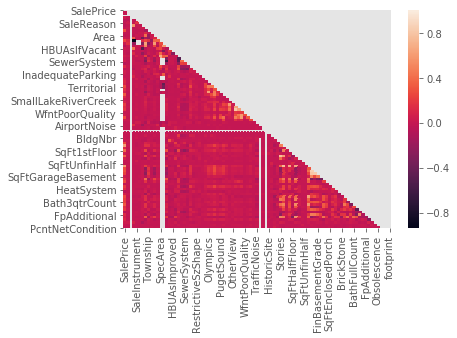

In [91]:
# Try adding the code in this cell to the mask attribute in the heatmap to halve the plot
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))

sns.heatmap(df.corr(), mask=mask);

In [130]:
small = df[['SalePrice', 'SqFtTotLiving', 'SqFtTotBasement','SqFtGarageAttached','FinBasementGrade','SqFtDeck']]
small.corr()

,SalePrice,SqFtTotLiving,SqFtTotBasement,SqFtGarageAttached,FinBasementGrade,SqFtDeck
SalePrice,1.000000,0.622011,0.270560,0.169888,0.235084,0.207006
SqFtTotLiving,0.622011,1.000000,0.309810,0.461433,0.248020,0.240104
SqFtTotBasement,0.270560,0.309810,1.000000,-0.327196,0.805960,0.272789
SqFtGarageAttached,0.169888,0.461433,-0.327196,1.000000,-0.314234,0.021137
FinBasementGrade,0.235084,0.248020,0.805960,-0.314234,1.000000,0.268148
SqFtDeck,0.207006,0.240104,0.272789,0.021137,0.268148,1.000000


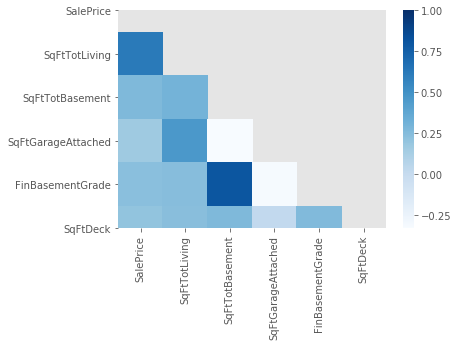

In [131]:
mask = np.triu(np.ones_like(small.corr(), dtype=np.bool))

sns.heatmap(small.corr(), mask=mask, cmap= 'Blues');

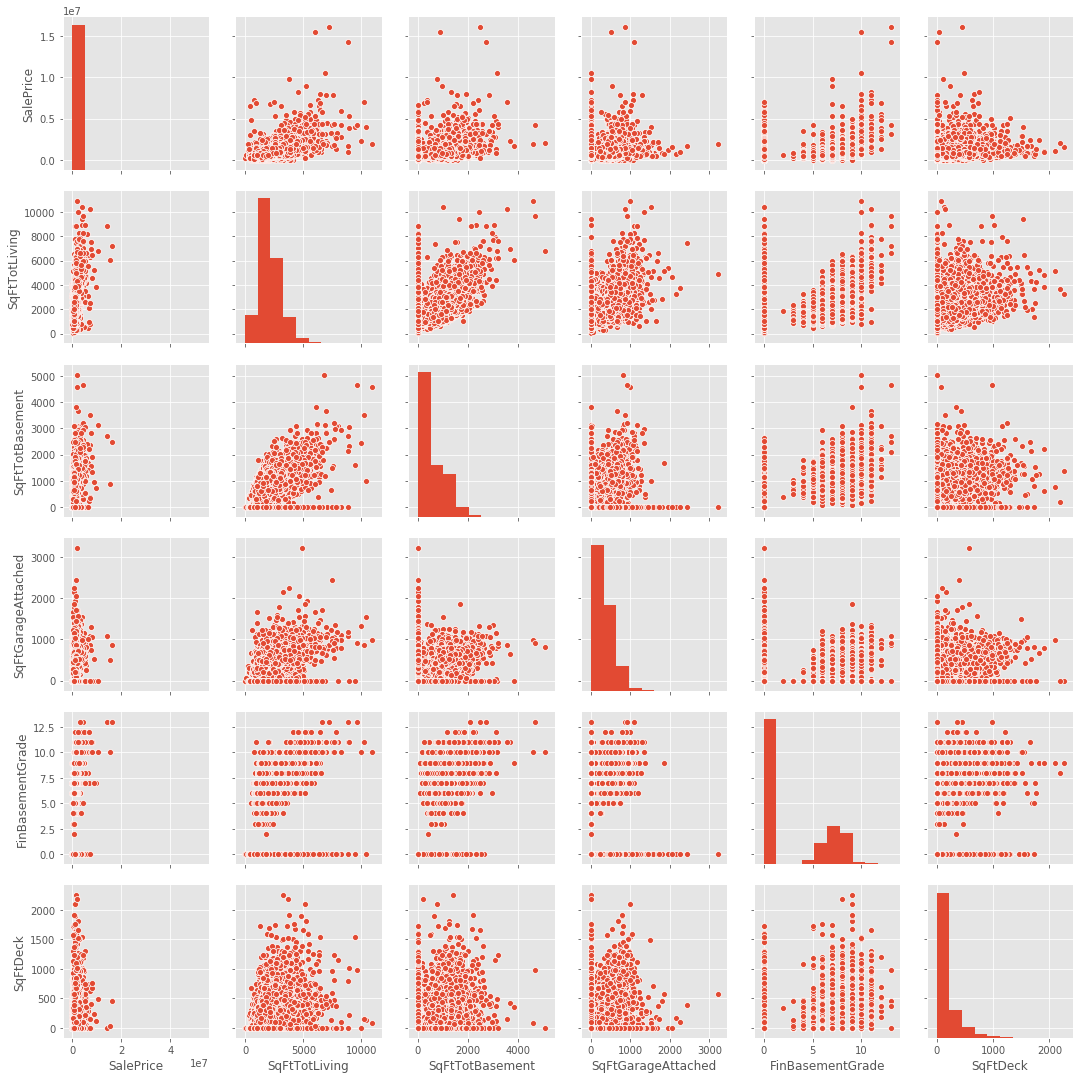

In [132]:
sns.pairplot(small)

In [133]:
fsm_df = small[["SalePrice", "SqFtTotLiving"]].copy()
fsm_df.dropna(inplace=True)

In [134]:
# build the R-style formula. The format is "target~feature_1 + feature_2 + feature_3"
formula = 'SalePrice~SqFtTotLiving'
# Fit the model on the dataframe composed of the two features
fsm = ols(formula=formula, data=fsm_df).fit()

In [136]:
# get Summary
fsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                 1.187e+04
Date:                Wed, 17 Jun 2020   Prob (F-statistic):               0.00
Time:                        19:58:03   Log-Likelihood:            -2.7203e+05
No. Observations:               18807   AIC:                         5.441e+05
Df Residuals:                   18805   BIC:                         5.441e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.591e+04   8189.002     -1.942      0.052    -3.2e+04     144.477
SqFtTotLiving   378.6638      3.476    108.935      0.000     371.850     385.477
==============================================================================
Omnibus:                    24151.837   Durbin-Watson:                   1.118
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         12404873.130
Skew:                           6.729   Prob(JB):                         0.00
Kurtosis:                     128.096   Cond. No.                     5.72e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [137]:
rsquared = fsm.rsquared
params = fsm.params

print(f'Rsquared of FSM: {rsquared}')
print('----------')
print('Beta values of FSM:')
print(params)

Rsquared of FSM: 0.3868973483695256
----------
Beta values of FSM:
Intercept       -15906.705123
SqFtTotLiving      378.663772
dtype: float64
